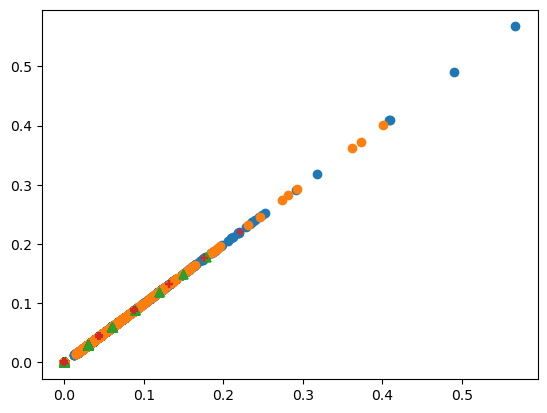

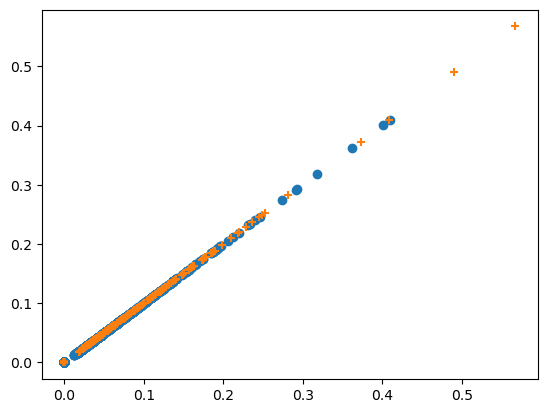

[1]
0.7857142857142857 0.6666666666666666
[[0.         0.         0.05371563 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07406779 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03978467 0.04680046 0.119354   ... 0.         0.         0.        ]] [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]


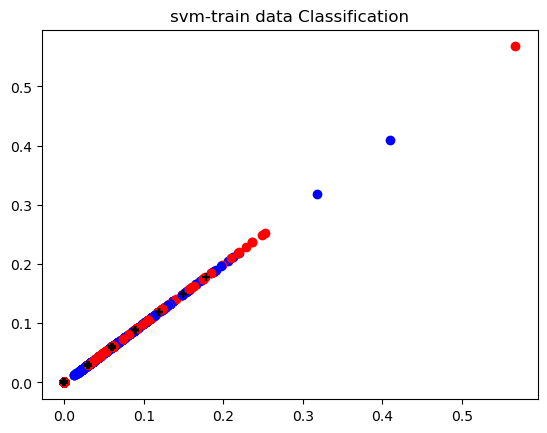

[1]


In [116]:
import numpy as np
import re
import pandas as pd
import glob
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer

paths = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_ture'
file_list = glob.glob(paths + '/*.txt')

text_list = []

paths_2 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_false'

false_path = glob.glob(paths_2+'/*.txt')

false_list = []

path_3 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_test'

test_path = glob.glob(path_3+'/*.txt')

test_list = []

path_4 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_2'

test_path_2 = glob.glob(path_4+'/*.txt')

test_2_list = []

for file in range(len(file_list)):
    with codecs.open(file_list[file], 'r', encoding = 'utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "", 
                          str(open_text.strip()))
        text_list.append(open_text)
        
for file in range(len(false_path)):
    with codecs.open(false_path[file], 'r', encoding ='utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        false_list.append(open_text)
        
for file in range(len(test_path)):
    with codecs.open(test_path[file], 'r', encoding ='utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        test_list.append(open_text)
        
        
for file in range(len(test_path_2)):
    with codecs.open(test_path_2[file], 'r', encoding ='utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        test_2_list.append(open_text)

        
# 데이터 전처리

dic_text = {'Text' : [] }
ii = 0

# for i in text_list :
#     dic_text[ii] = okt.morphs(i)
#     ii = ii+1
    
dic_value = {0 : []}    
    
ii = 0    
    
    
tfidf_vectorizer = TfidfVectorizer()


tfidf_vectorizer.fit(text_list)

array_value = []

for i in text_list :
    array_value.append(tfidf_vectorizer.transform([text_list[ii]]).toarray())
    ii = ii+1
    
false_value = []
ii = 0

tfidf_vectorizer.fit(false_list)

for i in false_list :
    false_value.append(tfidf_vectorizer.transform([false_list[ii]]).toarray())
    ii = ii+1
    
    
    
test_value = []

tfidf_vectorizer.fit(test_list)

test_value.append(tfidf_vectorizer.transform(test_list).toarray())

test_value = np.array(test_value)


test_2_value = []

tfidf_vectorizer.fit(test_2_list)

test_2_value.append(tfidf_vectorizer.transform(test_2_list).toarray())
    
import matplotlib.pyplot as plt
import numpy as np

# plt.scatter(array_value[0][:], array_value[0][:])
# plt.scatter(array_value[1][:], array_value[1][:])
# plt.scatter(array_value[2][:], array_value[2][:])
# plt.scatter(array_value[3][:], array_value[3][:])

# plt.scatter(false_value[0][:], false_value[0][:], marker = '^')
# plt.scatter(false_value[1][:], false_value[1][:], marker = '^')
# plt.scatter(false_value[2][:], false_value[2][:], marker = '^')
# plt.show()



    
num = 0

rows = 10
cols = 2

dic_false = [[0 for j in range(cols)] for i in range(rows)]

for i in false_value:
    dic_false[num][0] = i
    dic_false[num][1] = 1
    num = num+1
    

dic_ture = [[0 for j in range(cols)] for i in range(rows)]

num =0

for i in array_value :
    dic_ture[num][0] = i
    dic_ture[num][1] = 0
    num = num+1
    

from sklearn.model_selection import train_test_split

# np.array(dic_false, dtype = 'object')
# np.array(dic_true)



num = 0

false_value = np.array(false_value)
array_value = np.array(array_value)

false_value = np.pad(false_value, pad_width = ((0,0),(0,0),(0,847)), mode = 'constant', constant_values =0)


# test_value = np.pad(test_value, pad_width = ((0,0),(0,0),(0,)), mode = 'constant', constant_values =0)

false_value = false_value.reshape(10, 2853)
array_value = array_value.reshape(10, 2853)


label = [0]*10 + [1]*10

test_2_value = np.array(test_2_value)

# print(test_value.shape, test_2_value.shape)


test_value = np.pad(test_value, pad_width = ((0,0),(0,0),(0,2357)), mode = 'constant', constant_values =0)
test_2_value = np.pad(test_2_value, pad_width = ((0,0),(0,0),(0,2544)), mode = 'constant', constant_values =0)


test_value = test_value.reshape(1,2853)
test_2_value = test_2_value.reshape(1,2853)

total = np.vstack((array_value, false_value)) ## 값 제대로 넣은거

train_input, test_input, train_label, test_label = train_test_split(total, label,
                                                                   test_size = 0.3, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(train_input, train_label)

plt.scatter(train_input[:],train_input[:])
plt.scatter(test_input[:], test_input[:])
plt.scatter(test_value[:], test_value[:], marker ='^')
plt.scatter(test_2_value[:], test_2_value[:], marker = '+')


plt.show()



plt.scatter(array_value[:],array_value[:])
plt.scatter(false_value[:],false_value[:], marker = '+')
plt.show()


print(knn.predict(test_value))

train_score = knn.score(train_input,train_label)
test_score = knn.score(test_input, test_label)

print(train_score, test_score)


# svm 으로 시도해보기 재도전 

from sklearn import svm



total = np.vstack((array_value, false_value))

x_train, x_test, y_train, y_test = train_test_split(total,label,test_size = 0.3, random_state = 42)

x = x_train
y = y_train

print(x, y)

from sklearn.metrics import confusion_matrix
from sklearn import *

# def make_meshgrid(x, y, h =.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                         np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, z, **params)
#     return out

# # meshgird를 통해 contour plot을 생성하는 함수임 
    
# C = 1.0
# models = (svm.SVC(kernel = 'linear', C=C),
#          svm.LinearSVC(C=C, max_iter = 10000),
#          svm.SVC(kernel='rbf', gamma = 0.7, C=C),
#          svm.SVC(kernel='poly', degree = 3, gamma = 'auto', C=C))

# models = (clf.fit(x,y) for clf in models)

# #plot title 생성

# titles = ('SVC with linear kernel', 'LinearSVC (linear kernel)', 'SVC with RBF kernel',
#          'SVC with polynomial (degree 3) kernel')

# fig, sub = plt.subplots(2,2)

# plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

# x0, x1 = x[:,0], x[:,1]
# xx, yy = make_meshgrid(x0, x1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     plot_contours(ax, clf, xx, yy,
#                  cmap=plt.cm.coolwarm, s = 20, edgecolors = 'k')
#     ax.set_xlim(xx.min(),xx.max())
#     ax.set_ylim(yy.min(),yy_max())
#     ax.set_xlabel('Sepal length')
#     ax.set_ylabel('Sepal width')
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)
    
# plt.show()


sv = svm.SVC(kernel = 'linear', C =1)
result = sv.fit(x,y)

plt.figure(3)
plt.title('svm-train data Classification')
predict1 = sv.predict(x)
predict1 = predict1.astype(float)

print(predict1)



for i in range(10):
    if predict1[i]==0:
        plt.scatter(x[i][:],x[i][:], color = 'blue')
        
    if predict1[i]==1:
        plt.scatter(x[i][:],x[i][:], color = 'red')
        
        

        
        
xx = np.linspace(-3,2,100)
yy = np.linspace(-2,5,100)

X, Y = np.meshgrid(xx,yy)
xy = np.vstack([X.ravel(),Y.ravel()]).T


# plt.contour(X,Y, colors = 'k', levels = [0,0.1,0.5])

plt.scatter(test_value[:],test_value[:], color = 'k', marker = '+')

plt.show()

print(sv.predict(test_value))

